# Project 02 - Image Processing

## Student Information

- Full name:
- Student ID:
- Class:

## Required Libraries

In [1]:
# IMPORT YOUR LIBS HERE
import matplotlib.pyplot as plt
import PIL
import numpy as np

## Function Definitions

In [2]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    img = PIL.Image.open(img_path)
    return np.asarray(img)


def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : <your type>
        Image
    '''

    # YOUR CODE HERE
    plt.imshow(img)
    plt.show()


def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : <your type>
        Image
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    ext = img_path.split('.')[-1].lower()
    if ext in ['png', 'pdf']:
        img.save(img_path, format=ext.upper())
    else:
        print("Unsupported file format. Please use either 'png' or 'pdf'.")


#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE

<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

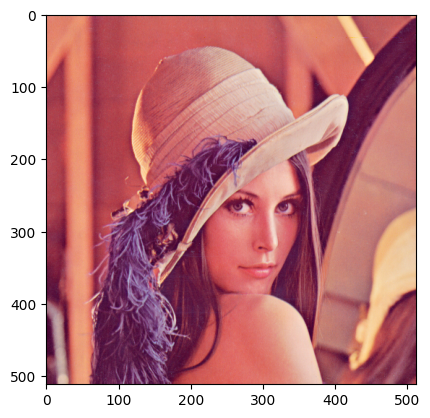

(512, 512, 3)
[  0   0   0 ... 511 511 511]
[  0   0   0 ... 511 511 511]
[[  0]
 [  0]
 [  0]
 ...
 [511]
 [511]
 [511]]


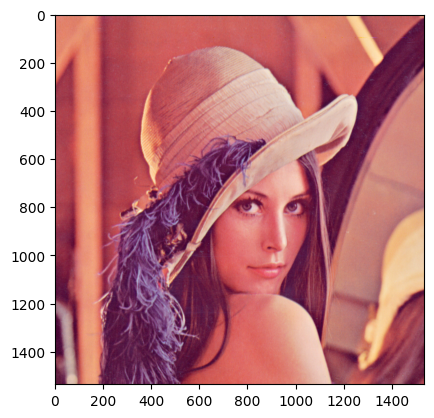

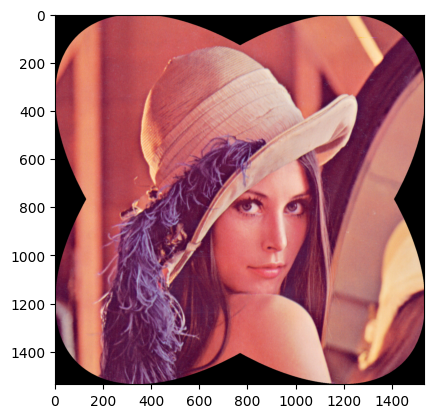

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214
 216 218 220 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250
 252 254 256 258 260 262 264 266 268 270 272 274 276 278 280 282 284 286
 288 290 292 294 296 298 300 302 304 306 308 310 312 314 316 318 320 322
 324 326 328 330 332 334 336 338 340 342 344 346 348 350 352 354 356 358
 360 362 364 366 368 370 372 374 376 378 380 382 384 386 388 390 392 394
 396 398 400 402 404 406 408 410 412 414 416 418 420 422 424 426 428 430
 432 434 436 438 440 442 444 446 448 450 452 454 456 458 460 462 464 466
 468 470 472 474 476 478 480 482 484 486 488 490 49

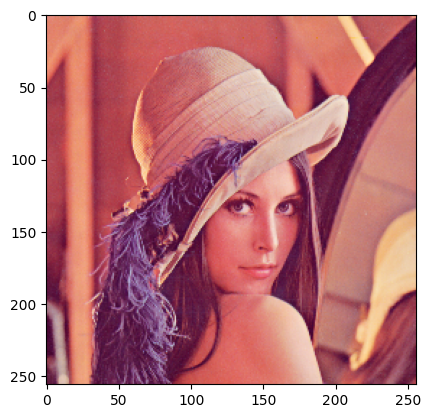

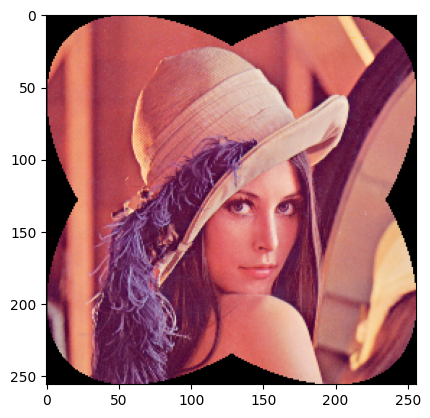

In [45]:
# YOUR CODE HERE
def change_brightness(img, level):
    '''
    Change the brightness of the image

    Parameters
    ----------
    img : np.ndarray
        Image array
    level : int
        Brightness level to be added

    Returns
    -------
    np.ndarray
        Brightness adjusted image
    '''

    # Change to float => avoid overflow
    new_img = img.astype(float) + level

    # Change back to int => normal rbg value
    new_img = np.clip(new_img, 0, 255).astype(int)

    return new_img

def change_contrast(img, level):
    '''
    Change the contrast of the image

    Parameters
    ----------
    img : np.ndarray
        Image array
    level : float
        Contrast adjustment factor.
        Values > 1 increase contrast, values between 0 and 1 decrease contrast.

    Returns
    -------
    np.ndarray
        Contrast adjusted image
    '''

    # Convert image to float to prevent overflow/underflow
    img = img.astype(float)

    # Calculate the mean of the image
    mean = np.mean(img)

    # Apply contrast adjustment
    new_img = mean + level * (img - mean)

    # Clip values to be in the range [0, 255]
    new_img = np.clip(new_img, 0, 255).astype(int)

    return new_img

def flip_image(img, axis):
    '''
    Flip the image along the specified axis

    Parameters
    ----------
    img : np.ndarray
        Image array
    axis : str
        Axis along which to flip the image ('Vertical' or 'Horizontal')

    Returns
    -------
    np.ndarray
        Flipped image
    '''

    if axis == 'Horizontal':
        new_img = img[::-1]
    if axis == 'Vertical':
        new_img = img[:, ::-1]
    return new_img

def green_blue_yellow_scaling_image(img):
    gby_img = 0.2989 * img[:, :, 0] + 0.5870 * img[:, :, 1] + 0.1140 * img[:, :, 2]
    gby_img = gby_img.astype(np.uint8)
    return gby_img

def grayscaling_image(img):
    '''
    Convert an RGB image to grayscale

    Parameters
    ----------
    img : np.ndarray
        RGB image array

    Returns
    -------
    np.ndarray
        Grayscale image
    '''

    # img = img.astype(float)
    # Calculate the gray value
    gray_pixels = np.dot(img[..., 0:3].astype(float), [0.2989, 0.5870, 0.1140])

    # Put the gray value across the rgb
    gray_img = np.stack((gray_pixels, gray_pixels, gray_pixels), axis=-1)

    # Over/Underflow  check
    gray_img = np.clip(gray_img, 0, 255)

    return gray_img.astype(int)

def add_sepia_filter(img):
    '''
    Convert an RGB image to sepia

    Parameters
    ----------
    img : np.ndarray
        RGB image array

    Returns
    -------
    np.ndarray
        Image with sepia filter
    '''

    sepia_filter = np.array([[0.393, 0.769, 0.189],
                            [0.349, 0.686, 0.168],
                            [0.272, 0.534, 0.131]])

    sepia_red_pixels = np.dot(img[..., 0:3], sepia_filter[0])
    sepia_green_pixels = np.dot(img[..., 0:3], sepia_filter[1])
    sepia_blue_pixels = np.dot(img[..., 0:3], sepia_filter[2])

    sepia_img = np.stack((sepia_red_pixels, sepia_green_pixels, sepia_blue_pixels), axis=-1)

    sepia_img = np.clip(sepia_img, 0, 255)

    return sepia_img.astype(int)

def conv2d_fast(img, krn):
    """
    Performs a 2D convolution on an image using a given kernel, optimized for speed.

    Parameters:
    ----------
    img (numpy.ndarray): The input image.
    krn (numpy.ndarray): The convolution kernel.

    Returns:
    ----------
    numpy.ndarray: The result of the convolution.
    """

    is0, is1, ks0, ks1 = *img.shape, *krn.shape
    rs0, rs1 = is0 - ks0 + 1, is1 - ks1 + 1
    
    ix0 = np.arange(ks0)[:, None] + np.arange(rs0)[None, :]
    ix1 = np.arange(ks1)[:, None] + np.arange(rs1)[None, :]
    
    res = krn[:, None, :, None] * img[(ix0.ravel()[:, None], ix1.ravel()[None, :])].reshape(ks0, rs0, ks1, rs1)
    res = res.transpose(1, 3, 0, 2).reshape(rs0, rs1, -1).sum(axis = -1)

    return res

def conv2d_faster(img, krn):
    is0, is1 = img.shape
    ks0, ks1 = krn.shape
    
    # Compute the shape of the output
    rs0, rs1 = is0 - ks0 + 1, is1 - ks1 + 1

    # Define the strides for the input image
    strides = img.strides + img.strides
    img_2d = np.lib.stride_tricks.as_strided(img, shape=(rs0, rs1, ks0, ks1), strides=strides)
    
    # Perform the convolution
    result = np.tensordot(img_2d, krn, axes=((2, 3), (0, 1)))
    
    return result

def convolution_v7(img, krn):
    """
    Performs a 2D convolution on a 3-channel (RGB) image using a given kernel, optimized for speed.

    Parameters:
    ----------
    img (numpy.ndarray): The input 3-channel image.
    krn (numpy.ndarray): The convolution kernel.

    Returns:
    ----------
    numpy.ndarray: The result of the convolution.
    """

    img_r = img[:, :, 0]
    img_b = img[:, :, 1]
    img_g = img[:, :, 2]

    new_img_r = conv2d_fast(img_r, krn)
    new_img_b = conv2d_fast(img_b, krn)
    new_img_g = conv2d_fast(img_g, krn)

    new_img = np.stack((new_img_r, new_img_b, new_img_g), axis=-1)

    return new_img.astype(int)

def convolution_v8(img, krn):
    img_r = img[:, :, 0]
    img_b = img[:, :, 1]
    img_g = img[:, :, 2]

    new_img_r = conv2d_faster(img_r, krn)
    new_img_b = conv2d_faster(img_b, krn)
    new_img_g = conv2d_faster(img_g, krn)

    new_img = np.stack((new_img_r, new_img_b, new_img_g), axis=-1)

    return new_img.astype(int)

def crop_circle(img):
    """
    Crops an image to keep the content within a circle centered in the image.

    Parameters:
    ----------
    img (numpy.ndarray): The input image to be cropped.

    Returns:
    ----------
    numpy.ndarray: The cropped image.
    """

    h, w = img.shape[0], img.shape[1]
    r = h//2

    center_x, center_y = h//2, w//2

    Y, X = np.ogrid[:h, :w]

    # Contrast the coordinate within the circle(0 and 1)
    mask = (X - center_x)**2 + (Y - center_y)**2 <= r**2

    new_img = img * mask[:, :, np.newaxis]

    return new_img

def crop_center_square(image_array, crop_size):
    '''
    Crop a square from the center of the image.

    Parameters
    ----------
    image_array : np.ndarray
        3D numpy array representing the image (height, width, channels).
    crop_size : int
        The size of the square crop(pixel).

    Returns
    -------
    np.ndarray
        Cropped square image as a 3D numpy array.
    '''
    height, width, channels = image_array.shape
    
    # Ensure the crop size is not larger than the image dimensions
    crop_size = min(crop_size, height, width)
    
    # Calculate the center of the image
    center_y, center_x = height // 2, width // 2
    
    # Calculate the coordinates for cropping
    half_crop = crop_size // 2
    y1 = max(center_y - half_crop, 0)
    y2 = min(center_y + half_crop, height)
    x1 = max(center_x - half_crop, 0)
    x2 = min(center_x + half_crop, width)
    
    # Crop the image
    cropped_image = image_array[y1:y2, x1:x2]
    
    # Handle the case where the cropped area is smaller than the desired crop_size
    if cropped_image.shape[0] < crop_size or cropped_image.shape[1] < crop_size:
        padded_image = np.pad(cropped_image, ((0, crop_size - cropped_image.shape[0]), (0, crop_size - cropped_image.shape[1]), (0, 0)), mode='constant')
        return padded_image
    
    return cropped_image

# https://www.youtube.com/watch?v=v9CFu4r6tPY
def zoom_img(img, scale):
    """
    Zooms into an image by a given scale factor.

    Parameters:
    ----------
    img (numpy.ndarray): The input image to be zoomed.
    scale (float): The zoom factor. A scale > 1 will zoom in, a scale < 1 will zoom out.

    Returns:
    ----------
    numpy.ndarray: The zoomed image.
    """

    new_rows = int(scale*img.shape[0])
    new_cols = int(scale*img.shape[1])

    zoomed_img = np.zeros((new_rows, new_cols, img.shape[2]), dtype=int)

    # for i in range(new_rows):
    #     for j in range(new_cols):
    #         zoomed_img[i, j, :] = img[int(i/scale), int(j/scale), :]

    row_indices = np.clip((np.arange(new_rows) / scale).astype(int), 0, img.shape[0] - 1)
    col_indices = np.clip((np.arange(new_cols) / scale).astype(int), 0, img.shape[1] - 1)

    print(row_indices)
    print(col_indices)

    row_indices = row_indices[:, np.newaxis]
    print(row_indices)

    # Use advanced indexing to construct the zoomed image
    zoomed_img = img[row_indices, col_indices, :]
    zoomed_img = np.clip(zoomed_img, 0 , 255)

    return zoomed_img

def crop_rotated_ellipse(img):
    """
    Crops an image to keep the content within two rotated ellipses centered in the image.

    Parameters:
    ----------
    img (numpy.ndarray): The input image to be cropped.

    Returns:
    ----------
    numpy.ndarray: The cropped image.
    """

    h, w = img.shape[0], img.shape[1]

    # Step 1: Calculate k (distance from center to corner)
    k = np.sqrt((w/2)**2 + (h/2)**2)

    # Step 2: Choose a reasonable value for a such that a != b
    a = w / 3

    # Step 3: Calculate b using a^2 + b^2 = k^2
    b = np.sqrt(k**2 - a**2)

    # Step 4: Define the mask for the rotated ellipse
    Y, X = np.ogrid[:h, :w]
    center_x, center_y = w // 2, h // 2

    # Rotation transformation
    cos45 = 1 / np.sqrt(2)
    sin45 = 1 / np.sqrt(2)
    
    X_rot = cos45 * (X - center_x) + sin45 * (Y - center_y)
    Y_rot = -sin45 * (X - center_x) + cos45 * (Y - center_y)

    mask1 = ((X_rot)**2 / a**2) + ((Y_rot)**2 / b**2) <= 1

    mask2 = ((Y_rot)**2 / a**2) + ((X_rot)**2 / b**2) <= 1

    mask = mask1 | mask2

    new_img = img * mask[:, :, np.newaxis]

    return new_img

#   https://techmaster.vn/posts/35474/convolution-tich-chap-giai-thich-bang-code-thuc-te
# https://www.youtube.com/watch?v=8rrHTtUzyZA
test_img_path = "Picture/Test/test10.png"

img = read_img(test_img_path)
show_img(img)
print(img.shape)

zoomed_img_1 = zoom_img(img, 3)
show_img(zoomed_img_1)

elp_img_1 = crop_rotated_ellipse(zoomed_img_1)
show_img(elp_img_1)

zoomed_img_2 = zoom_img(img, 0.5)
show_img(zoomed_img_2)

elp_img_2 = crop_rotated_ellipse(zoomed_img_2)
show_img(elp_img_2)

# zoomed_img = zoom_img(img, 2)
# show_img(zoomed_img)

# crop_img = crop_center_square(img, 250)
# show_img(crop_img)

# gray_scaled_img = grayscaling_image(img)
# show_img(gray_scaled_img[:, :, :])

# print(img)
# print(red_img.shape)

# brightness_img = change_brightness(img, -100)
# show_img(brightness_img)

# contrast_img = change_contrast(img, 0.5)
# show_img(contrast_img)

# vertical_img = flip_image(img, 'Vertical')
# show_img(vertical_img)

# horizontal_img = flip_image(img, 'Horizontal')
# show_img(horizontal_img)

# gray_scaled_img = grayscaling_image(img)
# show_img(gray_scaled_img)

# sepia_img = add_sepia_filter(img)
# show_img(sepia_img)

# circle_img = crop_circle(img)
# show_img(circle_img)

# blur_kernel = np.ones((3,3))/9
# sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
# sharpen_img = convolution_v7(img, blur_kernel)
# show_img(sharpen_img)

# blur_kernel = np.ones((3,3), dtype=float)*1/9
# print(blur_kernel)
# print(*img.shape)
# blur_img = conv2d_slow(img, blur_kernel)
# show_img(blur_img)

## Main FUNCTION

In [4]:
# YOUR CODE HERE

In [5]:
# Call main function